In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\HAI\Downloads\EDA1\EDA1\Cardiotocographic.csv")
df = pd.DataFrame(data)
#print frist 5 rows
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
#print last 5 rows
df.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
2121,140.0,0.000000,0.961268,0.007426,0.0,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.0,2.000000
2122,140.0,0.000775,0.000000,0.006979,0.0,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.0,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.0,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.0,2.000000
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.0,1.000000


In [4]:
###Data Cleaning and Preparation####
#check for the null values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
#If numarical column as outliers have we can used the Median
#If numarical column not there outliers we can used the mean
#if catagorical column as null values we can used the mode

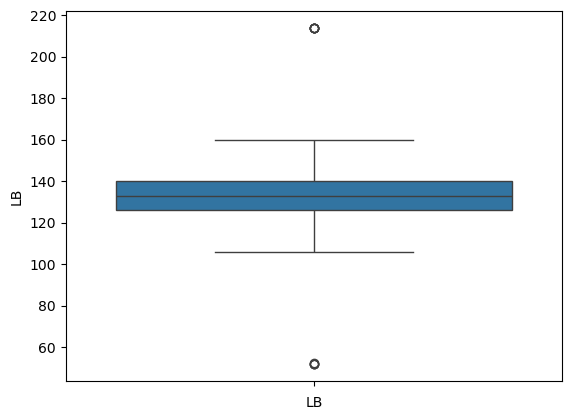

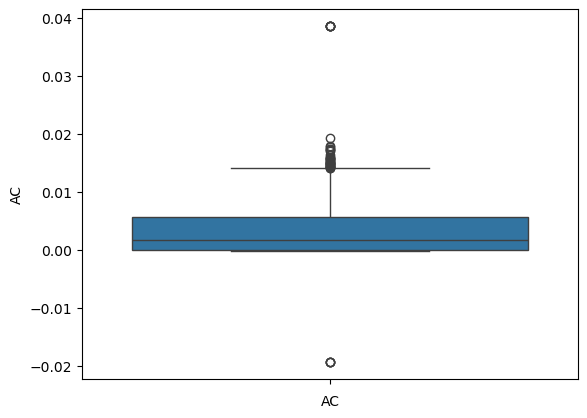

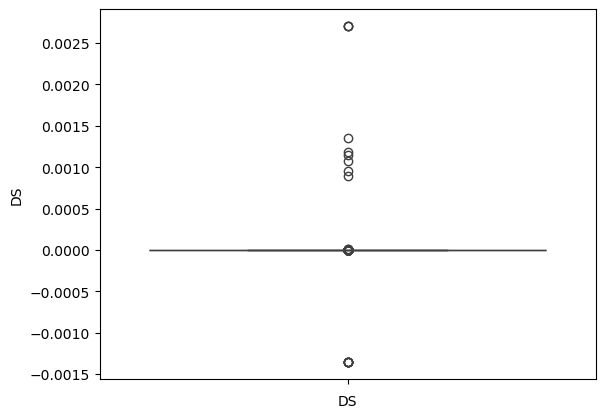

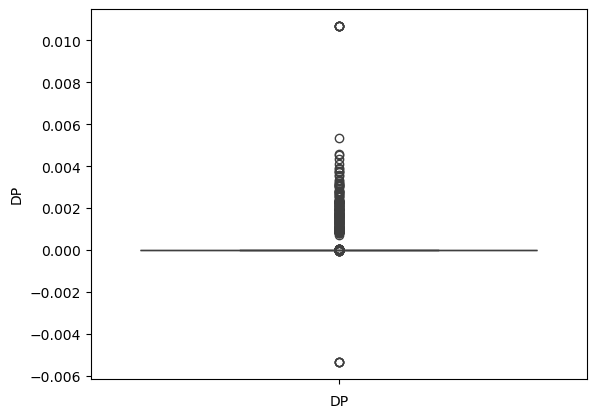

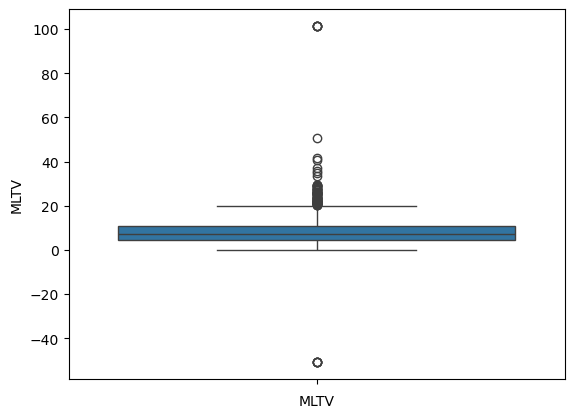

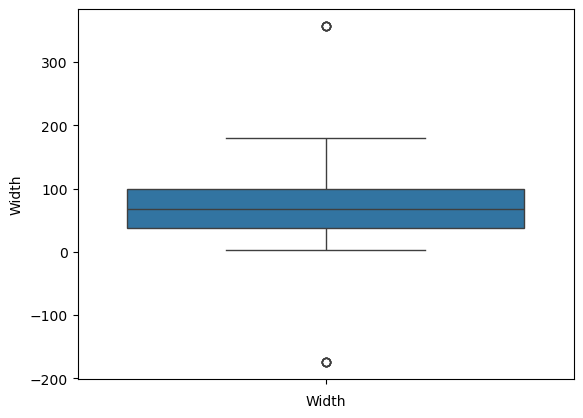

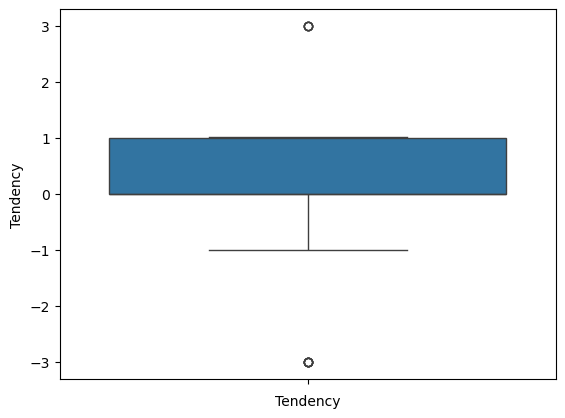

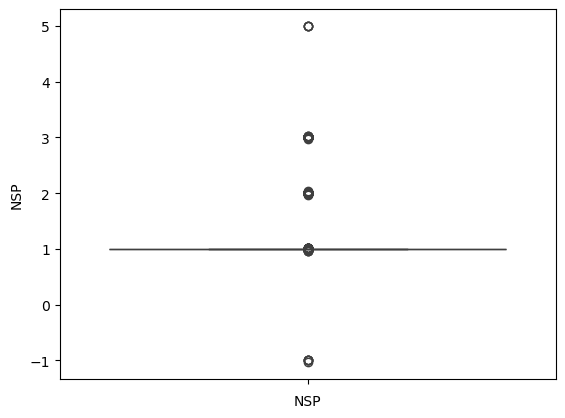

In [6]:
#for numarical columns we can Detect the outliers we can used the boxplot
columns = df[['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']]
for col in columns:
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [7]:
#if we fill the missing values we can changed the columns float into int
df['LB'] = pd.to_numeric(df['LB'],errors = 'coerce')
df['LB'] = df['LB'].fillna(df['LB'].median())

In [8]:
df.isnull().sum()

LB           0
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [9]:
df['AC'] = pd.to_numeric(df['AC'],errors = 'coerce')
df['AC'] = df['AC'].fillna(df['AC'].median())

In [10]:
df.isnull().sum()

LB           0
AC           0
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [11]:
df['DS'] = pd.to_numeric(df['DS'],errors = 'coerce')
df['DS'] = df['DS'].fillna(df['DS'].median())

In [12]:
df['DP'] = pd.to_numeric(df['DP'],errors = 'coerce')
df['DP'] = df['DP'].fillna(df['DP'].median())

In [13]:
df['MLTV'] = pd.to_numeric(df['MLTV'],errors = 'coerce')
df['MLTV'] = df['MLTV'].fillna(df['MLTV'].median())

In [14]:
df['Width'] = pd.to_numeric(df['Width'],errors = 'coerce')
df['Width'] = df['Width'].fillna(df['Width'].median())

In [15]:
df['Tendency'] = pd.to_numeric(df['Tendency'],errors = 'coerce')
df['Tendency'] = df['Tendency'].fillna(df['Tendency'].median())

In [16]:
df['NSP'] = pd.to_numeric(df['NSP'],errors = 'coerce')
df['NSP'] = df['NSP'].fillna(df['NSP'].median())

In [17]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

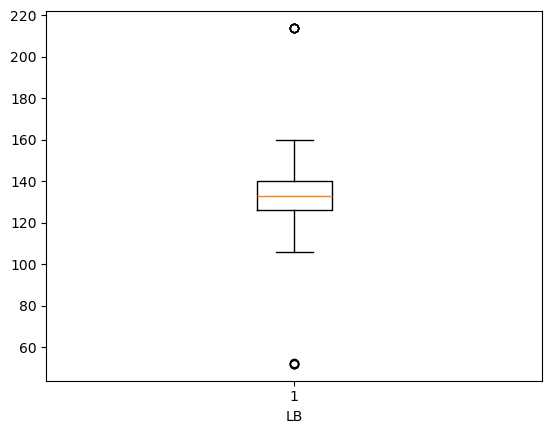

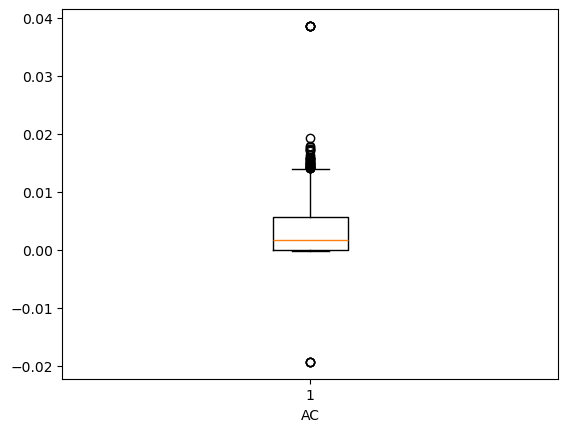

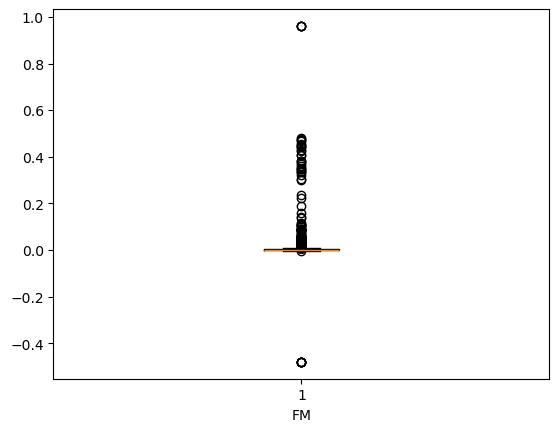

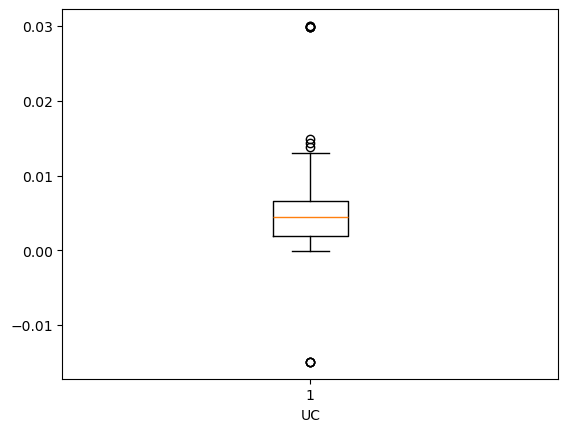

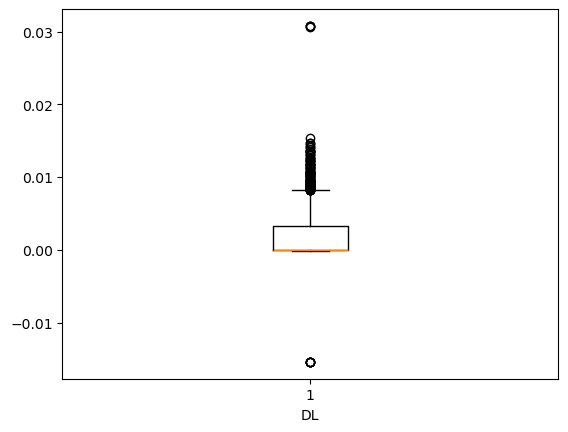

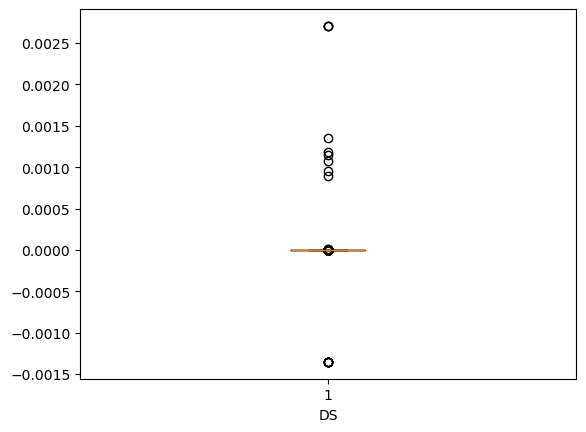

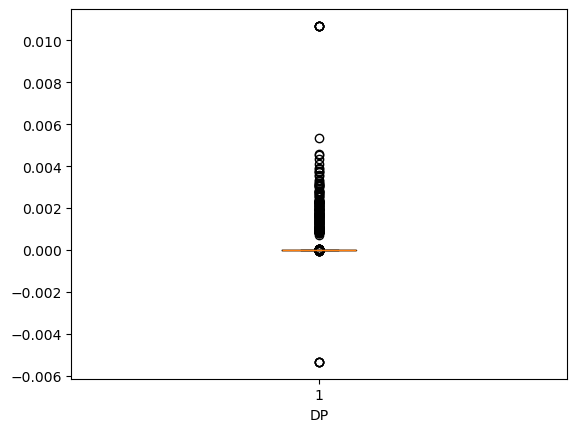

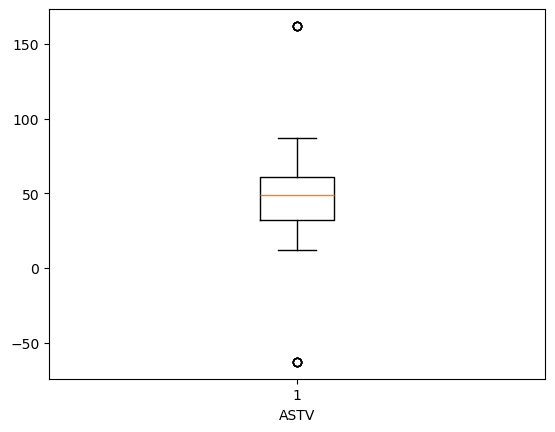

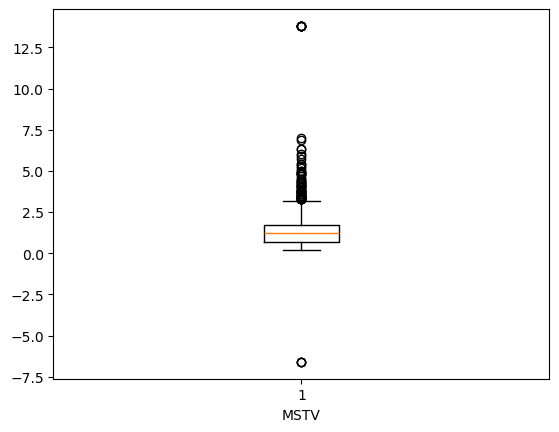

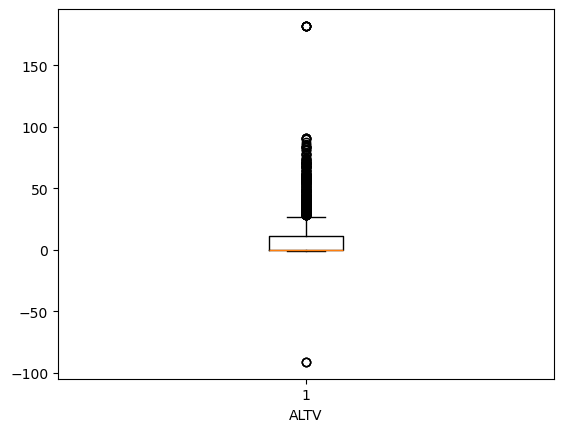

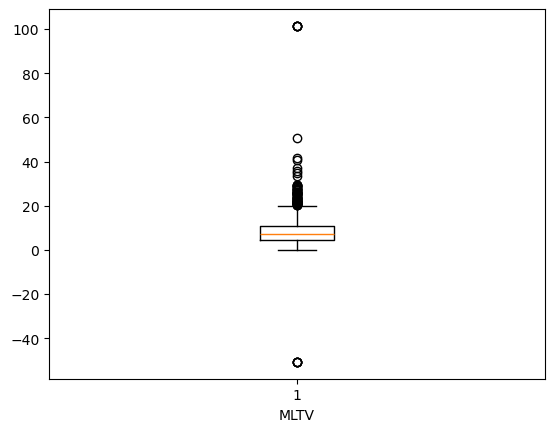

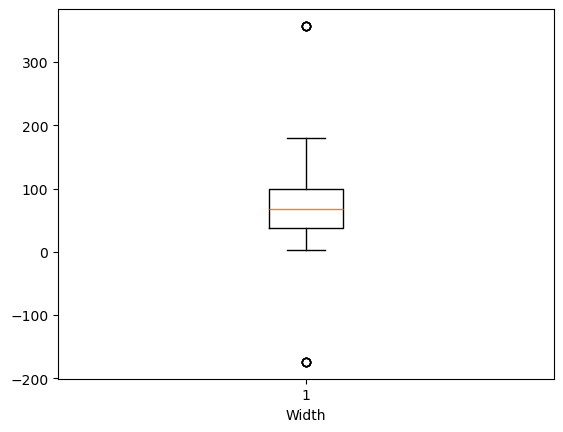

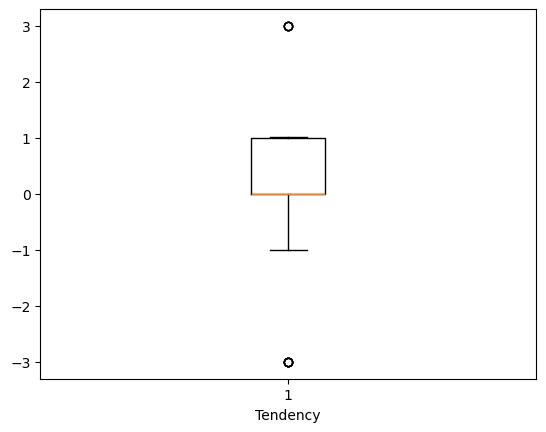

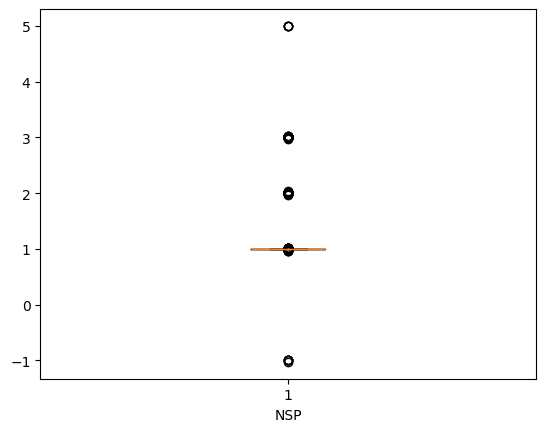

In [18]:
#we can treat outliers used the Remove Outliers,Cap/Floor,Transform the Data,Impute Outliers

for col in df.select_dtypes(include = 'number'):
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [19]:
# Calculate IQR for each column separately to treat outliers
for col in ['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Cap the values
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

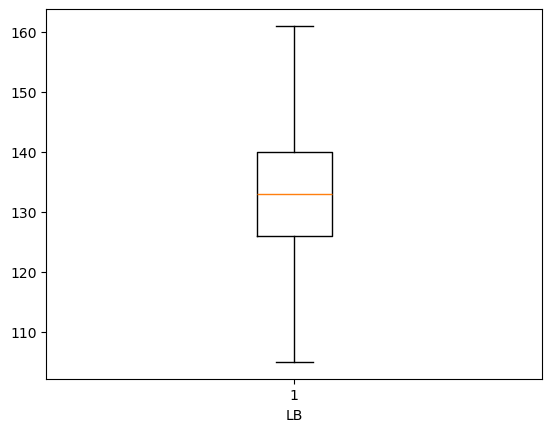

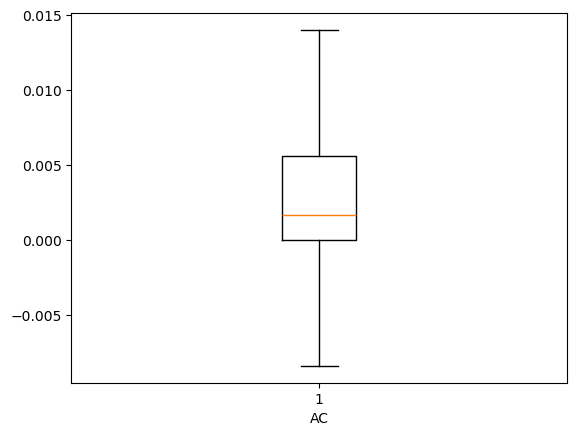

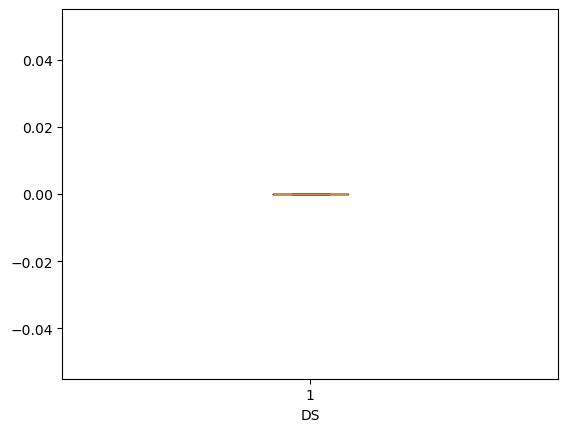

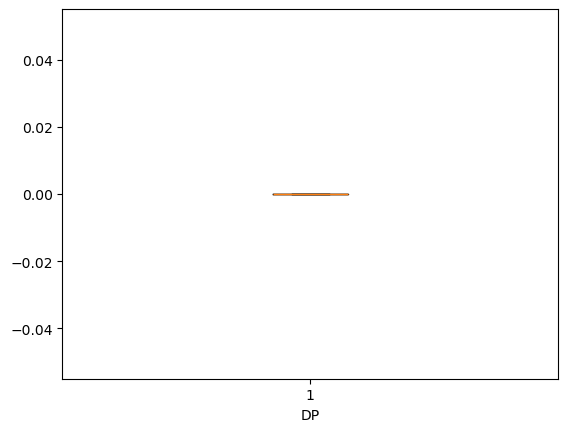

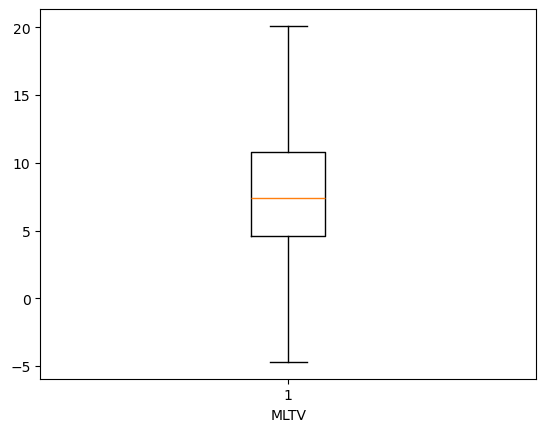

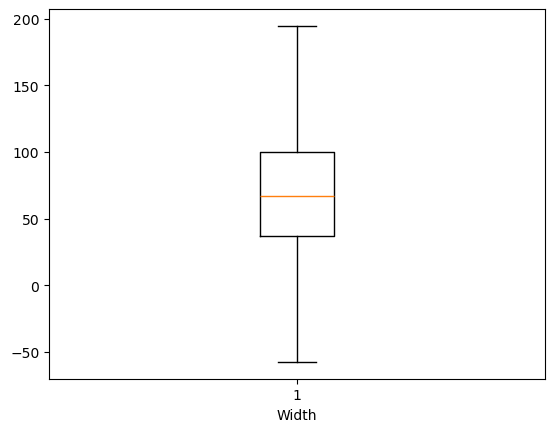

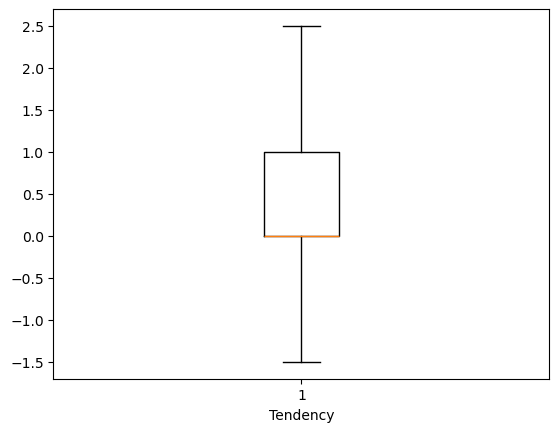

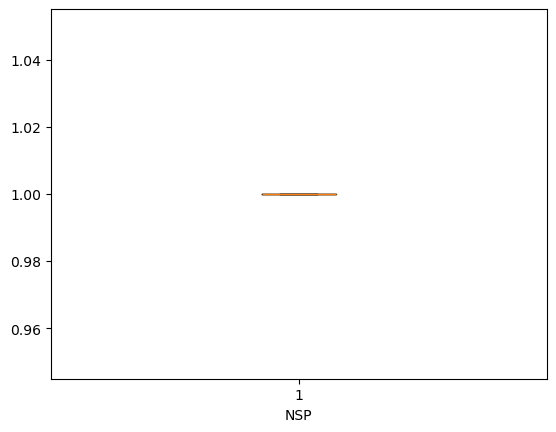

In [20]:
columns = ['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']

for col in columns:
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [21]:
###Statistical Summary###
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.290331,9.930268,105.000000,126.000000,133.000000,140.000000,161.000000
AC,2126.0,0.003132,0.003828,-0.008409,0.000000,0.001634,0.005606,0.014015
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769
DS,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000


In [22]:
###Data Visualization###

df.head(20)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5000,43.000000,2.4,64.000000,0.999926,1.0
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1000,0.000000,10.4,130.000000,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1000,0.000000,13.4,130.000000,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4000,0.000000,20.1,117.000000,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4000,0.000000,19.9,117.000000,1.000000,1.0
5,134.000000,0.001116,0.000000,0.010493,0.009444,0.0,0.0,26.0,5.9000,0.000000,0.0,150.000000,0.000000,1.0
6,134.000000,0.001403,0.000000,0.012623,0.008415,0.0,0.0,29.0,6.3000,0.000000,0.0,150.000000,0.000000,1.0
7,122.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,83.0,0.5000,6.000000,15.6,69.920261,1.000000,1.0
8,122.000000,0.014015,0.000000,0.001517,0.000000,0.0,0.0,84.0,0.5000,5.000000,13.6,68.000000,1.000000,1.0
9,122.000000,0.000000,0.000000,0.002967,0.000000,0.0,0.0,86.0,0.3000,6.000000,10.6,68.000000,1.000000,1.0


In [23]:
#converted all columns into int
for col in df.columns:
    df[col] = df[col].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   LB        2126 non-null   int64
 1   AC        2126 non-null   int64
 2   FM        2126 non-null   int64
 3   UC        2126 non-null   int64
 4   DL        2126 non-null   int64
 5   DS        2126 non-null   int64
 6   DP        2126 non-null   int64
 7   ASTV      2126 non-null   int64
 8   MSTV      2126 non-null   int64
 9   ALTV      2126 non-null   int64
 10  MLTV      2126 non-null   int64
 11  Width     2126 non-null   int64
 12  Tendency  2126 non-null   int64
 13  NSP       2126 non-null   int64
dtypes: int64(14)
memory usage: 232.7 KB


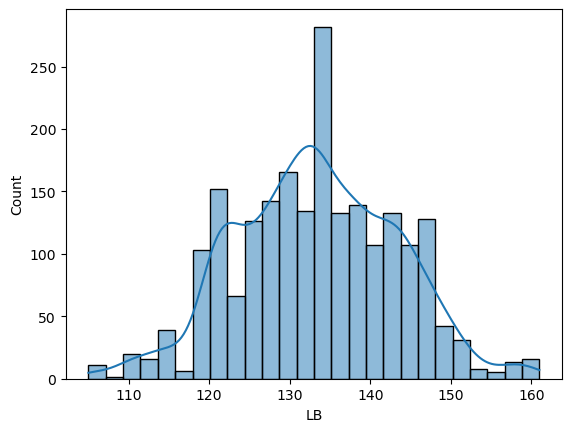

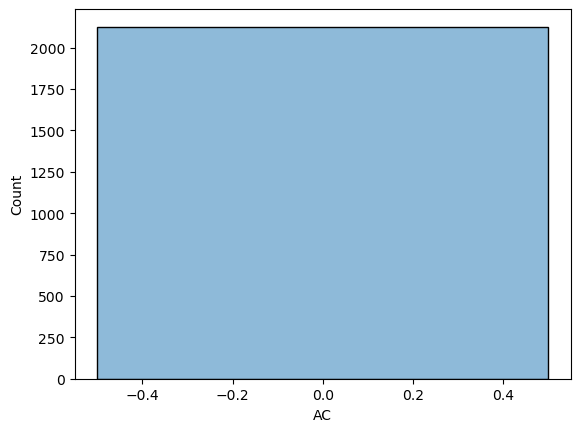

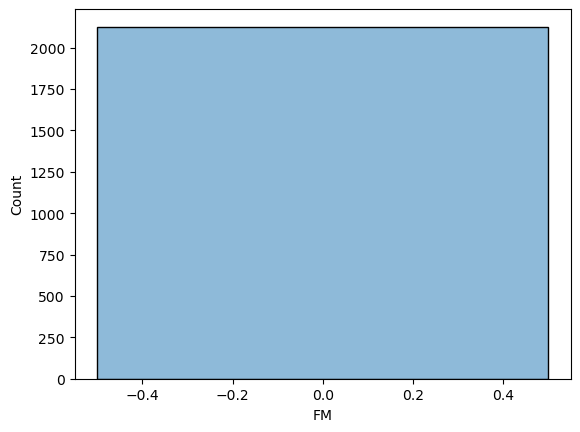

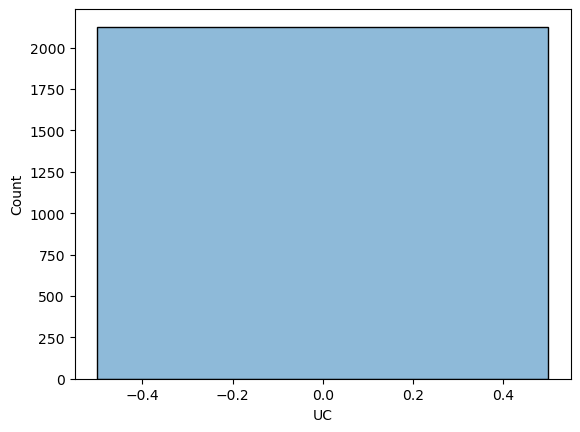

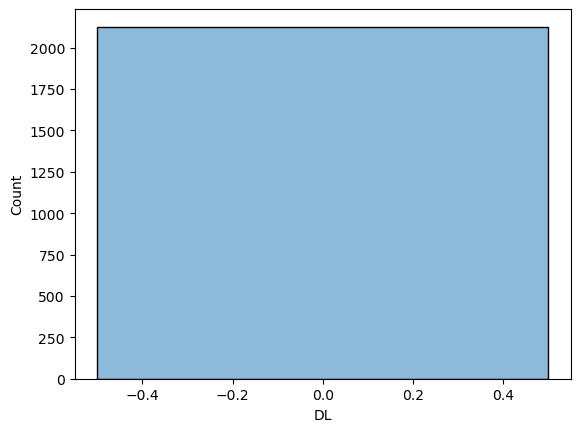

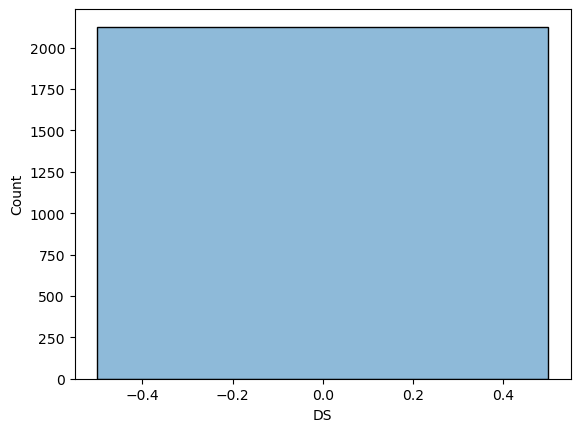

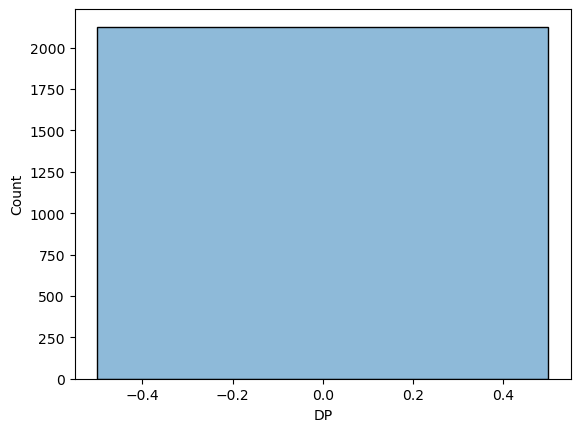

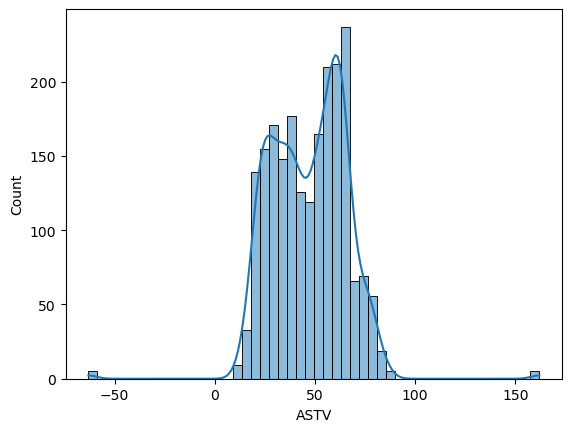

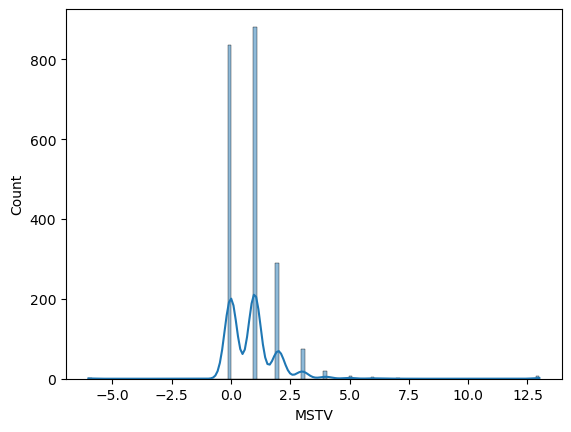

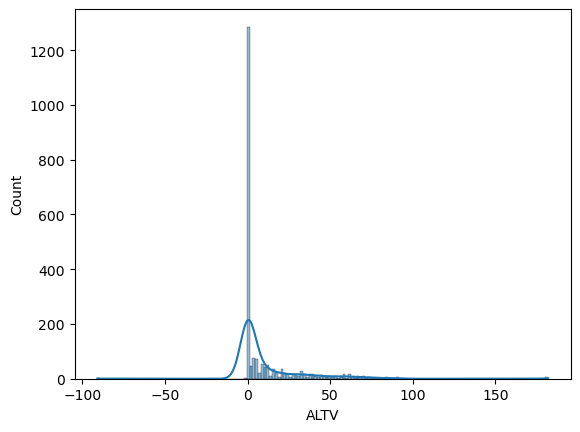

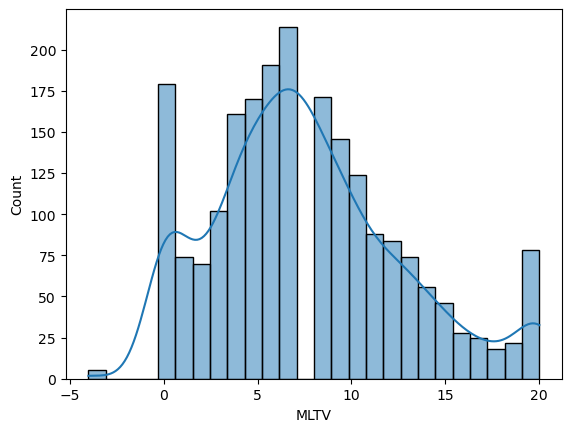

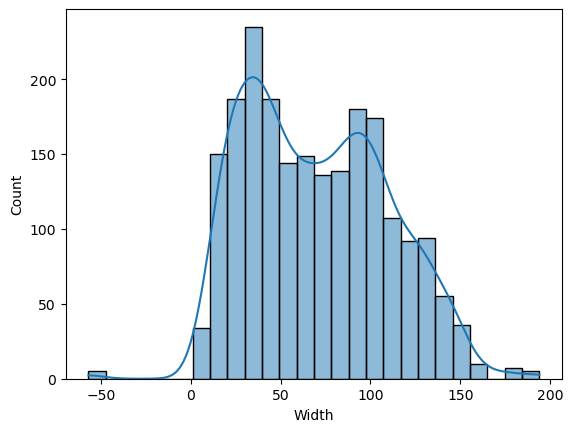

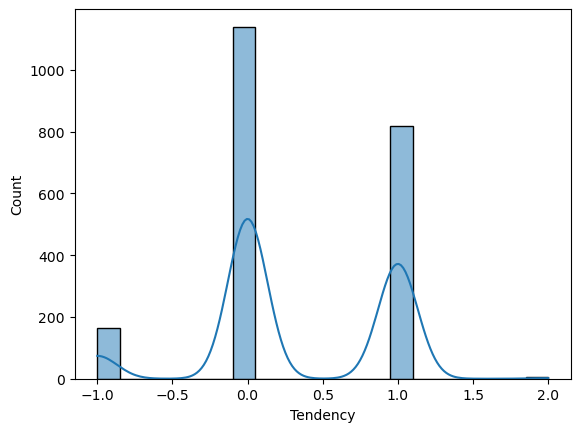

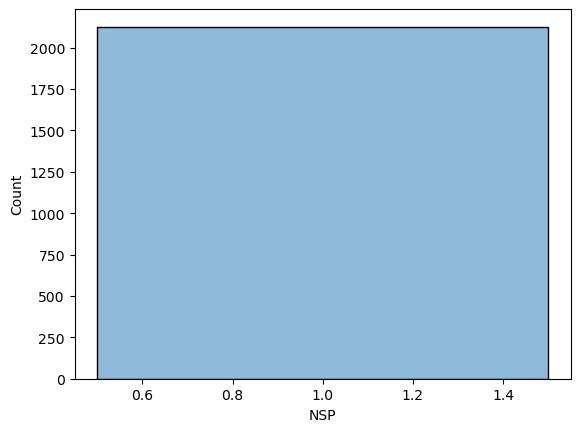

In [25]:
for col in df.columns:
    sns.histplot(x = df[col],kde = True)
    plt.xlabel(col)
    plt.show()

In [ ]:
#+1 → Strong positive correlation (as one increases, then other aslo increases).
#-1 → Strong negative correlation (as one increases, then other also decreases).
#0 → No correlation.

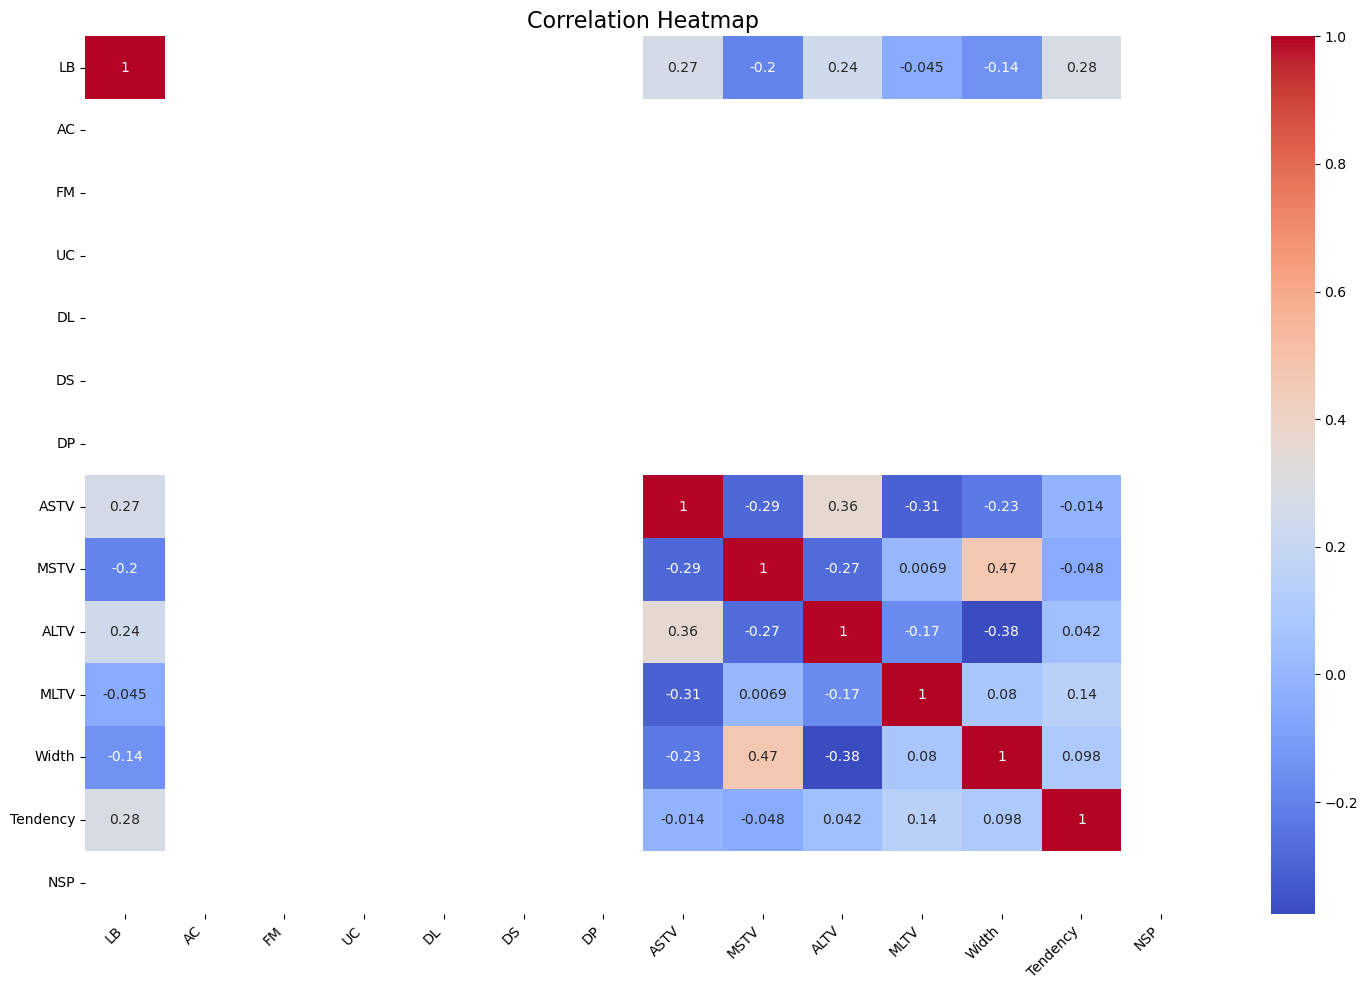

In [39]:
corr = df.corr()

# Set figure size
plt.figure(figsize=(15,10))

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()